In [ ]:
!git clone https://github.com/mahedishato/Bangla-Sentiment-Analysis.git

Cloning into 'Bangla-Sentiment-Analysis'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 2.44 MiB | 4.52 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [1]:
import pandas as pd, numpy as np, plotly.express as px, seaborn as sns, re
from sklearn.model_selection import train_test_split
import keras

In [2]:
from keras.preprocessing.text import Tokenizer

In [3]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [5]:
df = pd.read_csv('/content/file1.csv')
display(df)

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,0.0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,1.0,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,2.0,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,3.0,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,4.0,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...,...
7382,730,NaN,NaN,NaN,ভালোবাসি ভাই অনেক বেশী,1
7383,731,NaN,NaN,NaN,তোমারে ভাই অনেক বেশী,1
7384,732,NaN,NaN,NaN,কসম ভাই অনেক বেশী,1
7385,733,NaN,NaN,NaN,তোমায় ভাই অনেক বেশী,1


In [6]:
df.shape

(7387, 6)

In [7]:
# Display general information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Display the number of rows and columns in the DataFrame
print("\nDataFrame Shape:")
print(df.shape)

# Display the total number of elements in the DataFrame
print("\nDataFrame Size:")
print(df.size)

# Display descriptive statistics of the DataFrame
print("\nDataFrame Descriptive Statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Display the last few rows of the DataFrame
print("\nLast few rows of the DataFrame:")
print(df.tail())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7387 entries, 0 to 7386
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  7387 non-null   int64  
 1   Unnamed: 0    6652 non-null   float64
 2   Unnamed: 1    0 non-null      float64
 3   Unnamed: 2    0 non-null      float64
 4   sentence      7387 non-null   object 
 5   sentiment     7387 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 346.4+ KB
None

DataFrame Shape:
(7387, 6)

DataFrame Size:
44322

DataFrame Descriptive Statistics:
       Unnamed: 0.1   Unnamed: 0  Unnamed: 1  Unnamed: 2    sentiment
count   7387.000000  6652.000000         0.0         0.0  7387.000000
mean    3031.131853  3325.500000         NaN         NaN     0.453770
std     2027.264391  1920.411327         NaN         NaN     0.497892
min        0.000000     0.000000         NaN         NaN     0.000000
25%     1111.500000  1

In [8]:
df['sentiment'].value_counts()

0    4035
1    3352
Name: sentiment, dtype: int64

In [9]:
df.reset_index(drop=True, inplace=True)
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [10]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []

train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values
for i in range(train_sentences.shape[0]):
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)

training_sentences=np.array(training_sentences)

In [11]:
test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)

testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.to_categorical(train_labels)


test_labels=keras.utils.to_categorical(test_labels)

In [12]:
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 5909
Testing Set Length: 1478
training_sentences shape: (5909,)
testing_sentences shape: (1478,)
train_labels shape: (5909, 2)
test_labels shape: (1478, 2)


In [13]:
training_sentences[3]

'দুদক এর কাজ পায় না ও তো বলেছিলেন পদ্মা সেতুর অর্থায়ন করবে ও তো আন্তজাতিক ওর কাছে এতটাকা না থাকলে আম জনতার কাছে থাকবে'

In [14]:
train_labels[3]

array([1., 0.], dtype=float32)

In [15]:
print(training_sentences.shape)
print(train_labels.shape)

(5909,)
(5909, 2)


In [16]:
vocab_size = 20000
embedding_dim = 300
max_length = 150
trunc_type='post'
oov_tok = ""

In [17]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))

18673


In [18]:
from keras.preprocessing.sequence import pad_sequences

In [19]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

In [20]:
print("Sentence :--> \n")
print(training_sentences[3]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[3])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[3])

Sentence :--> 

দুদক এর কাজ পায় না ও তো বলেছিলেন পদ্মা সেতুর অর্থায়ন করবে ও তো আন্তজাতিক ওর কাছে এতটাকা না থাকলে আম জনতার কাছে থাকবে

Sentence Tokenized and Converted into Sequence :--> 

[1886, 20, 67, 309, 2, 8, 24, 2144, 832, 1107, 7136, 103, 8, 24, 3699, 259, 87, 4789, 2, 193, 3060, 3061, 87, 236]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0

In [21]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5909, 150)
Padded shape(testing): (1478, 150)


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dropout, Dense, Bidirectional, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [25]:
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(128, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(128)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='sigmoid'))
    adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 300)          6000000   
                                                                 
 conv1d_3 (Conv1D)           (None, 148, 128)          115328    
                                                                 
 bidirectional_4 (Bidirecti  (None, 148, 256)          263168    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 148, 256)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dense_8 (Dense)             (None, 64)               

### **MODEL 2**

In [24]:
from tensorflow.keras.layers import Embedding, Conv1D, Bidirectional, LSTM, Dropout, Dense, Flatten, BatchNormalization

# Define your model
with tf.device('/gpu:0'):
    model = Sequential()

    # Embedding Layer
    #embedding_matrix = load_pretrained_embeddings()  # Implement a function to load pre-trained embeddings
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length, trainable=False))

    # Convolutional Layers
    model.add(Conv1D(128, kernel_size=3, activation="relu"))
    model.add(Conv1D(128, kernel_size=5, activation="relu"))

    # LSTM Layers
    model.add(Bidirectional(LSTM(256, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(256)))

    # Dense Layers with Regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.001), activation="relu"))

    # Batch Normalization
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(2, activation='sigmoid'))

    # Adam Optimizer
    adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

    # Model Summary
    model.summary()

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 300)          6000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 148, 128)          115328    
                                                                 
 conv1d_2 (Conv1D)           (None, 144, 128)          82048     
                                                                 
 bidirectional_2 (Bidirecti  (None, 144, 512)          788480    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 144, 512)          0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 512)               1574912   
 onal)                                                

In [26]:
history=model.fit(padded,train_labels,epochs=100,batch_size=512,
                  validation_data=(testing_padded,test_labels),
                  use_multiprocessing=True, workers=8)

Epoch 1/100
12/12 [==============================] - 23s 430ms/step - loss: 1.1678 - accuracy: 0.5356 - val_loss: 1.1604 - val_accuracy: 0.5690
Epoch 2/100
12/12 [==============================] - 4s 358ms/step - loss: 1.1569 - accuracy: 0.5405 - val_loss: 1.1477 - val_accuracy: 0.5690
Epoch 3/100
12/12 [==============================] - 3s 256ms/step - loss: 1.1441 - accuracy: 0.5414 - val_loss: 1.1324 - val_accuracy: 0.5690
Epoch 4/100
12/12 [==============================] - 3s 241ms/step - loss: 1.1269 - accuracy: 0.5752 - val_loss: 1.1134 - val_accuracy: 0.5954
Epoch 5/100
12/12 [==============================] - 3s 240ms/step - loss: 1.1082 - accuracy: 0.6026 - val_loss: 1.0976 - val_accuracy: 0.5974
Epoch 6/100
12/12 [==============================] - 3s 294ms/step - loss: 1.0879 - accuracy: 0.6169 - val_loss: 1.0719 - val_accuracy: 0.6292
Epoch 7/100
12/12 [==============================] - 3s 267ms/step - loss: 1.0473 - accuracy: 0.6607 - val_loss: 1.0268 - val_accuracy: 0.683

In [27]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


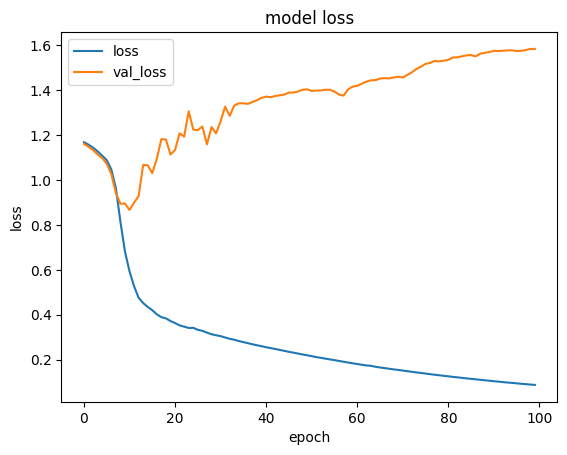

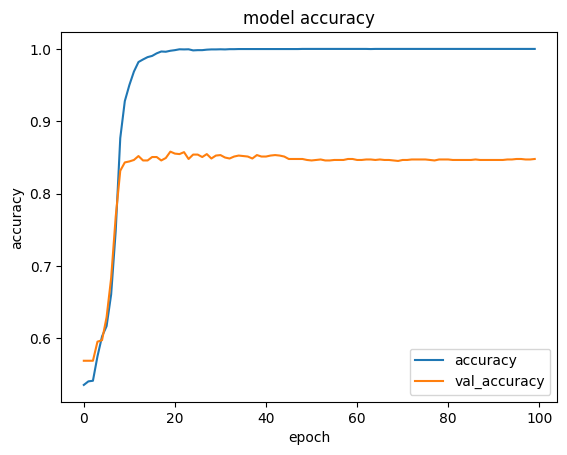

In [28]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [29]:
model.save_weights('model_weights_sentiment_82%.h5')

In [ ]:
twt = [input()]
#twt
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=200, dtype='int32', value=0)
#print(twt)

sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")